In [7]:
import pandas as pd
import numpy as np
data=pd.read_csv('datason.csv')
data.head()
sources = data.groupby('source').size()
np.sum(sources.values)
data=data.dropna() 
#data['content'][1]
data = data[data['source'] != 'bloomberght']
data = data[data['source'] != 'livetobloom.com']
data

,source,content,date,content-token,content-string,num_topic
0,sozcu,"i̇srail , vatandaş Yurt dış seyahat i̇srail ve...",11-3-2023,"['i̇srail', 'vatandaş', 'Yurt', 'dış', 'seyaha...",i̇srail vatandaş Yurt dış seyahat i̇srail Yahu...,7
1,euronews,By Euronews yayın tarih 03/11/2023 - 18:22 hab...,11-3-2023,"['By', 'Euronews', 'yayın', 'tarih', '03/11/20...",Euronews yayın tarih 03/11/2023 18:22 pay yoru...,7
2,sozcu,"Frans dışişleri bakanlık , i̇srailin düzenleme...",11-3-2023,"['Frans', 'dışişleri', 'bakanlık', 'i̇srailin'...",Frans dışişleri bakanlık i̇srailin düzenlemek ...,7
3,gazeteduvar,"duvar - Türkiye futbol federasyon , Galatasara...",11-3-2023,"['duvar', 'Türkiye', 'futbol', 'federasyon', '...",duvar Türkiye futbol federasyon Galatasaray Fe...,5
4,euronews,By Euronews yayın tarih 03/11/2023 - 15:18 hab...,11-3-2023,"['By', 'Euronews', 'yayın', 'tarih', '03/11/20...",Euronews yayın tarih 03/11/2023 15:18 pay yoru...,7
...,...,...,...,...,...,...
4852,hurriyet,haber devamıuzun süre güzelli̇ği̇n si̇mgesi̇ o...,2022-2023Q2,"['devamıuzun', 'süre', 'güzelli̇ği̇n', 'si̇mge...",devamıuzun süre güzelli̇ği̇n si̇mgesi̇ olmuştu...,1
4853,hurriyet,"haber devamıhull citynin sahip Acun ilıcalı , ...",2022-2023Q2,"['devamıhull', 'citynin', 'Acun', 'ilıcalı', '...",devamıhull citynin Acun ilıcalı Avrupa Kulüp s...,6
4854,hurriyet,haber devamıdünyaca ün i̇spanyol spor gazete M...,2022-2023Q2,"['devamıdünyaca', 'ün', 'i̇spanyol', 'spor', '...",devamıdünyaca i̇spanyol spor gazete Marca Avru...,6
4855,hurriyet,haber devamıkullanım talimat süre dolamak ayak...,2022-2023Q2,"['devamıkullanım', 'talimat', 'süre', 'dolamak...",devamıkullanım talimat süre dolamak ayakkabı ç...,2


In [8]:
data['date'] = data['date'].apply(lambda x: x.replace('2022-2023Q2', '05-01-2023'))
#data['date'] = pd.to_datetime(data['date'], errors='coerce', format='%Y-%m-%d')
data['date'] = data['date'].apply(lambda x: x.replace('2017', '06-06-2017'))
data['date'] = data['date'].apply(lambda x: x.replace('2022-2023Q1', '02-01-2023'))
data['date'] = data['date'].apply(lambda x: x.replace('2022-2023Q3', '08-01-2023'))
data['date'] = data['date'].apply(lambda x: x.replace('2022-2023Q4', '10-01-2023'))

data['date'].tail()

4852    05-01-2023
4853    05-01-2023
4854    05-01-2023
4855    05-01-2023
4856    05-01-2023
Name: date, dtype: object

In [9]:
data[['content-string', 'num_topic']]

,content-string,num_topic
0,i̇srail vatandaş Yurt dış seyahat i̇srail Yahu...,7
1,Euronews yayın tarih 03/11/2023 18:22 pay yoru...,7
2,Frans dışişleri bakanlık i̇srailin düzenlemek ...,7
3,duvar Türkiye futbol federasyon Galatasaray Fe...,5
4,Euronews yayın tarih 03/11/2023 15:18 pay yoru...,7
...,...,...
4852,devamıuzun süre güzelli̇ği̇n si̇mgesi̇ olmuştu...,1
4853,devamıhull citynin Acun ilıcalı Avrupa Kulüp s...,6
4854,devamıdünyaca i̇spanyol spor gazete Marca Avru...,6
4855,devamıkullanım talimat süre dolamak ayakkabı ç...,2


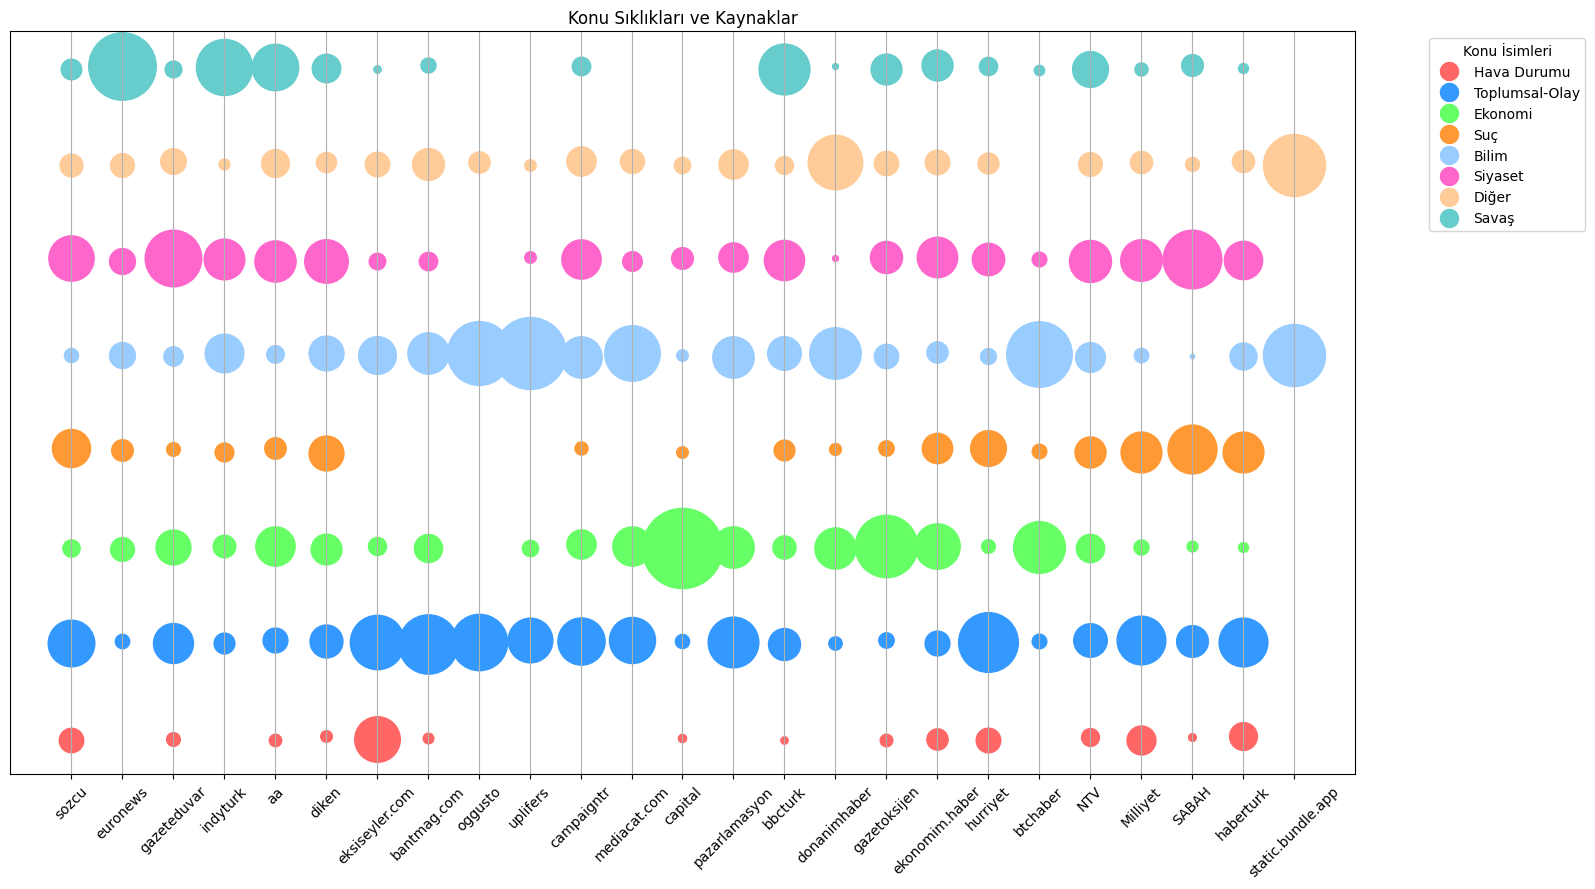

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import random 

# Konu numarası ve isim eşleşmeleri
topic_names = {
    0: 'Hava Durumu',
    1: 'Toplumsal-Olay',
    2: 'Ekonomi',
    3: 'Suç',
    4: 'Bilim',
    5: 'Siyaset',
    7: 'Savaş',
    6: 'Diğer'
}

# 'sources' sütununa göre gruplama
grouped_data = data.groupby('source')['num_topic']
# Her kaynağın toplam konu sayısına göre yüzdesini hesaplama
total_topics_by_source = grouped_data.size()
percentage_by_source = grouped_data.value_counts() / total_topics_by_source


# Balon grafik oluşturma
plt.figure(figsize=(16, 9))

# Rastgele renkler
colors = ['#FF6666', '#3399FF', '#66FF66', '#FF9933', '#99CCFF', '#FF66CC', '#FFCC99', '#66CCCC']


for source in data['source'].unique():
    topics = grouped_data.get_group(source)
    topic_counts = topics.value_counts()
    total_count = topic_counts.sum()
    
    # Balonları çizme
    for topic, count in topic_counts.items():
        percentage = count / total_count
        random_shift = random.uniform(-0.05, 0.0)  # Rastgele bir kaydırma değeri ekleyelim
        plt.scatter([source], [topic + random_shift], s=percentage * 4000, color=colors[topic % len(colors)], alpha=1)

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'{topic_names[topic]}', markerfacecolor=colors[i], markersize=15) for i, topic in enumerate(sorted(data['num_topic'].unique()))]
plt.legend(handles=legend_elements, title='Konu İsimleri', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Konu Sıklıkları ve Kaynaklar')
plt.ylabel('')
plt.yticks([])
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

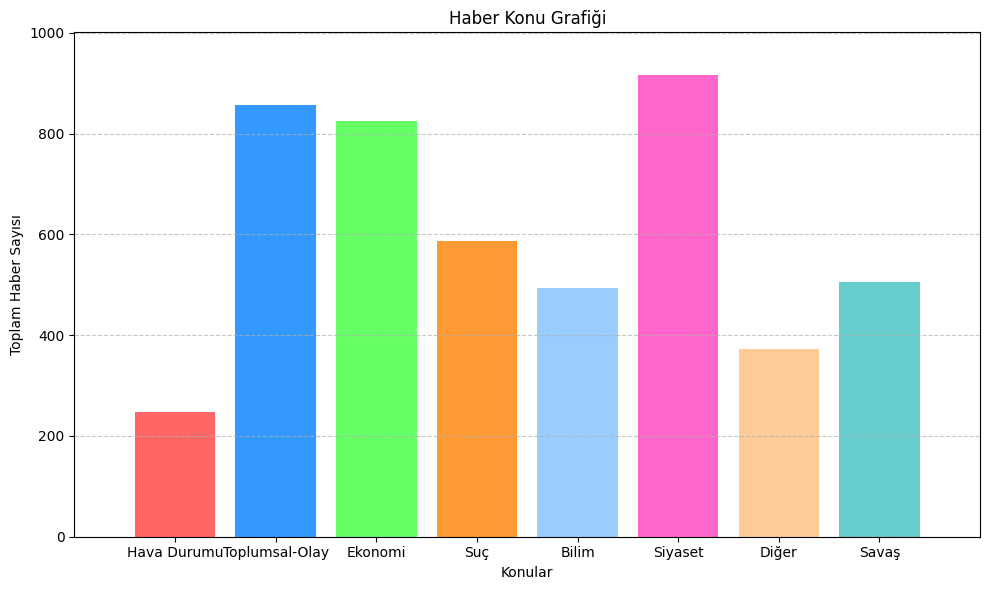

In [11]:
import matplotlib.pyplot as plt
import pandas as pd


# Konu sayılarını hesaplama
topic_counts = data['num_topic'].value_counts().sort_index()
# Konu numarası ve isim eşleşmeleri
topic_names = {
    0: 'Hava Durumu',
    1: 'Toplumsal-Olay',
    2: 'Ekonomi',
    3: 'Suç',
    4: 'Bilim',
    5: 'Siyaset',
    7: 'Savaş',
    6: 'Diğer'
}

# Bar chart oluşturma
plt.figure(figsize=(10, 6))

# Barları çizme
plt.bar(topic_counts.index, topic_counts.values, color=['#FF6666', '#3399FF', '#66FF66', '#FF9933', '#99CCFF', '#FF66CC','#FFCC99', '#66CCCC'])

# Eksen başlıkları ve etiketleri
plt.xlabel('Konular')
plt.ylabel('Toplam Haber Sayısı')
plt.title('Haber Konu Grafiği')

# Eksen sınırlarını ayarlama
plt.xlim(-1, len(topic_counts))
plt.ylim(0, 1000+ 1)

# Eksen etiketlerini ayarlama
plt.xticks(list(topic_counts.index), [topic_names[i] for i in topic_counts.index])

# Grid eklemek
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


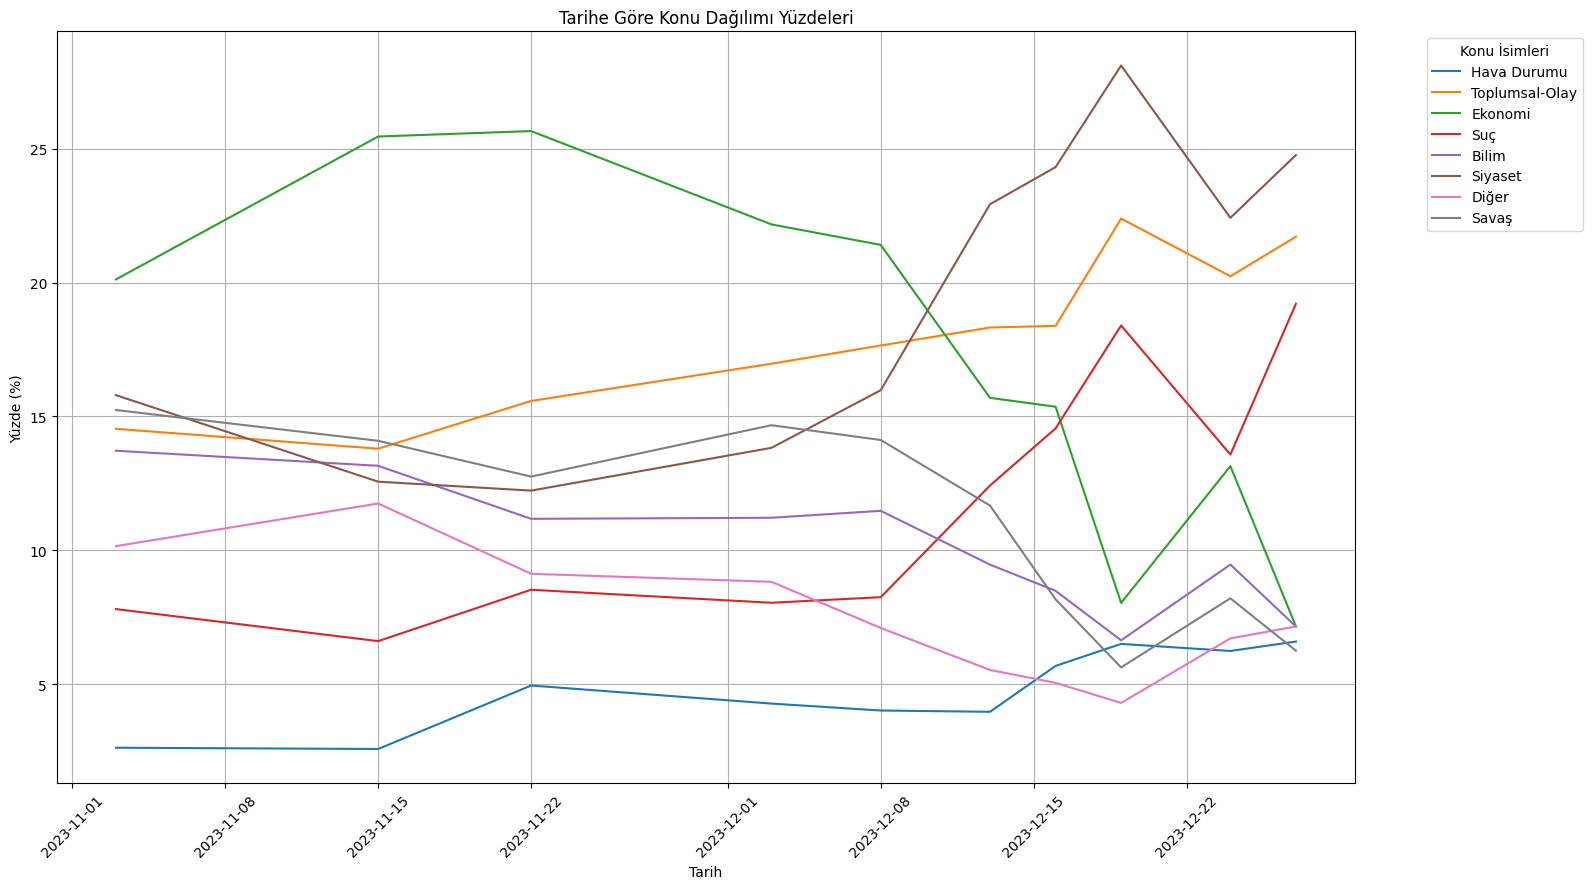

In [12]:


# 'date' sütununu datetime formatına dönüştürme
data['date'] = pd.to_datetime(data['date'])

# Veriyi tarihe göre sıralama
data_sorted = data.sort_values('date')

# Konu numarası ve isim eşleşmeleri
topic_names = {
    0: 'Hava Durumu',
    1: 'Toplumsal-Olay',
    2: 'Ekonomi',
    3: 'Suç',
    4: 'Bilim',
    5: 'Siyaset',
    7: 'Savaş',
    6: 'Diğer'
}
# 'date' sütununa göre gruplama ve yüzdelik değerleri hesaplama
grouped_data = data_sorted.groupby('date')['num_topic'].value_counts(normalize=True).unstack().fillna(0) * 100

# Yumusaklaştırma için rolling mean uygulama
smoothed_data = grouped_data.rolling(window=3).mean()

# Çizgi grafiği oluşturma
plt.figure(figsize=(16, 9))

# Sütun isimlerine göre çizgi çizme
for topic in smoothed_data.columns:
    topic_name = topic_names.get(topic, f'Topic {topic}')
    plt.plot(smoothed_data.index, smoothed_data[topic], label=topic_name)

# Grafik özellikleri
plt.title('Tarihe Göre Konu Dağılımı Yüzdeleri')
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.legend(title='Konu İsimleri', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()
